##  This notebook will evaluate correlations between the S&P 500 and Median House Sales Price over the last 5 years

In [15]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from datetime import datetime


from pathlib import Path
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from pathlib import Path

In [16]:
raw = pd.read_csv('Apartment_List_Rent_Estimates_2023_04.csv')
raw.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,2017_01,2017_02,...,2022_07,2022_08,2022_09,2022_10,2022_11,2022_12,2023_01,2023_02,2023_03,2023_04
0,United States,National,0,324697795,NaN,NaN,NaN,overall,1029.0,1030.0,...,1383,1388,1381,1369,1354,1341,1337,1341,1348,1355
1,United States,National,0,324697795,NaN,NaN,NaN,1br,883.0,884.0,...,1187,1190,1185,1174,1161,1150,1147,1150,1157,1162
2,United States,National,0,324697795,NaN,NaN,NaN,2br,1012.0,1013.0,...,1360,1364,1358,1346,1331,1318,1314,1318,1325,1332
3,California,State,6,39283497,California,NaN,NaN,overall,1559.0,1563.0,...,1998,2005,1997,1976,1947,1925,1915,1921,1932,1941
4,California,State,6,39283497,California,NaN,NaN,1br,1313.0,1317.0,...,1683,1689,1682,1664,1640,1622,1613,1618,1627,1635


In [17]:
formatted_df = pd.melt(raw, id_vars=['location_name', 'location_type', 'location_fips_code', 'population', 'state', 'county',
                                    'metro', 'bed_size'], var_name='date', value_name='median_rent_price')
formatted_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
0,United States,National,0,324697795,NaN,NaN,NaN,overall,2017_01,1029.0
1,United States,National,0,324697795,NaN,NaN,NaN,1br,2017_01,883.0
2,United States,National,0,324697795,NaN,NaN,NaN,2br,2017_01,1012.0
3,California,State,6,39283497,California,NaN,NaN,overall,2017_01,1559.0
4,California,State,6,39283497,California,NaN,NaN,1br,2017_01,1313.0


In [18]:
johnson_co_data_df = formatted_df.loc[formatted_df['location_name'] == 'Johnson County, KS']
johnson_co_data_df.head()

,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017_01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017_01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017_01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017_02,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017_02,878.0


In [11]:
# Load the S&P CSV file into a Pandas DataFrame
sandp_data_df = pd.read_csv("Input_Data/S&P 500 5 Year Historical Data.csv")

# Display sample data
sandp_data_df.head()

,date,Price,Open,High,Low,Vol.,Change %
0,1/1/2018,2823.81,"2,683.73",2872.87,"2,682.36",NaN,5.62%
1,2/1/2018,2713.83,"2,816.45",2835.96,"2,532.69",NaN,-3.89%
2,3/1/2018,2640.87,"2,715.22",2801.90,"2,585.89",NaN,-2.69%
3,4/1/2018,2648.05,"2,633.45",2717.49,"2,553.80",NaN,0.27%
4,5/1/2018,2705.27,"2,643.64",2742.24,"2,594.62",NaN,2.16%


In [19]:
#convert data in date column to a date format recognized by pandas
dates_string = johnson_co_data_df['date']
date_obj = pd.to_datetime(dates_string, format='%Y_%m')
johnson_co_data_df['date'] = date_obj
johnson_co_data_df

C:\Users\kjkra\AppData\Local\Temp\ipykernel_15212\2948171459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  johnson_co_data_df['date'] = date_obj


,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-01-01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-01-01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-01-01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-02-01,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-02-01,878.0
...,...,...,...,...,...,...,...,...,...,...
250795,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-03-01,1166.0
250796,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2023-03-01,1416.0
254172,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2023-04-01,1402.0
254173,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-04-01,1184.0


In [20]:
#sandp_data_df.shape[0]

sp_date_string = sandp_data_df['date']
sp_date_obj = pd.to_datetime(sp_date_string, format='%m/%d/%Y')
sandp_data_df['date'] = sp_date_obj
sandp_data_df

,date,Price,Open,High,Low,Vol.,Change %
0,2018-01-01,2823.81,"2,683.73",2872.87,"2,682.36",NaN,5.62%
1,2018-02-01,2713.83,"2,816.45",2835.96,"2,532.69",NaN,-3.89%
2,2018-03-01,2640.87,"2,715.22",2801.90,"2,585.89",NaN,-2.69%
3,2018-04-01,2648.05,"2,633.45",2717.49,"2,553.80",NaN,0.27%
4,2018-05-01,2705.27,"2,643.64",2742.24,"2,594.62",NaN,2.16%
...,...,...,...,...,...,...,...
60,2023-01-01,4076.60,"3,858.38",4094.32,"3,793.67",NaN,6.18%
61,2023-02-01,3970.15,"4,063.85",4195.34,"3,942.86",NaN,-2.61%
62,2023-03-01,4109.31,"3,958.20",4110.80,"3,810.54",NaN,3.51%
63,2023-04-01,4169.48,"4,102.50",4170.52,"4,049.30",NaN,1.46%


In [21]:
#convert data in date column to a date format recognized by pandas
dates_string = johnson_co_data_df['date']
date_obj = pd.to_datetime(dates_string, format='%Y_%m')
johnson_co_data_df['date'] = date_obj
johnson_co_data_df

C:\Users\kjkra\AppData\Local\Temp\ipykernel_15212\2948171459.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  johnson_co_data_df['date'] = date_obj


,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price
822,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-01-01,1036.0
823,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-01-01,875.0
824,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2017-01-01,1062.0
4200,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2017-02-01,1041.0
4201,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2017-02-01,878.0
...,...,...,...,...,...,...,...,...,...,...
250795,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-03-01,1166.0
250796,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2023-03-01,1416.0
254172,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2023-04-01,1402.0
254173,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2023-04-01,1184.0


Text(0, 0.5, 'Closing Price')

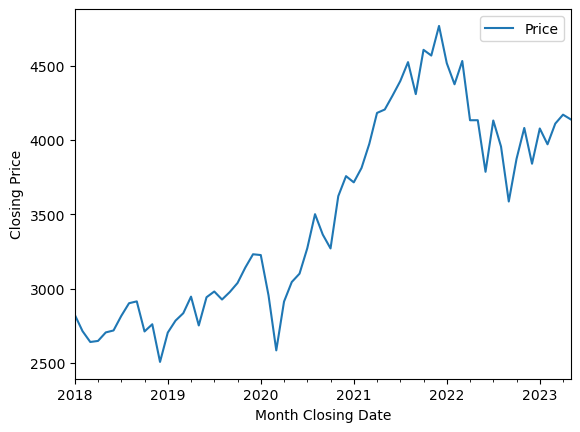

In [22]:
sandp_data_df.plot.line('date','Price')
plt.xlabel('Month Closing Date')
plt.ylabel('Closing Price')

In [23]:
# Merge Rental Price Data and S&P Data
Rent_SP_Df = pd.merge(johnson_co_data_df, sandp_data_df, on='date').reset_index()
Rent_SP_Df.head()

,index,location_name,location_type,location_fips_code,population,state,county,metro,bed_size,date,median_rent_price,Price,Open,High,Low,Vol.,Change %
0,0,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2018-01-01,1076.0,2823.81,"2,683.73",2872.87,"2,682.36",NaN,5.62%
1,1,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2018-01-01,908.0,2823.81,"2,683.73",2872.87,"2,682.36",NaN,5.62%
2,2,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",2br,2018-01-01,1103.0,2823.81,"2,683.73",2872.87,"2,682.36",NaN,5.62%
3,3,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",overall,2018-02-01,1069.0,2713.83,"2,816.45",2835.96,"2,532.69",NaN,-3.89%
4,4,"Johnson County, KS",County,20091,591506,Kansas,Johnson County,"Kansas City, MO-KS",1br,2018-02-01,903.0,2713.83,"2,816.45",2835.96,"2,532.69",NaN,-3.89%


##  Is there a correlation between the S&P and Monthly Rental Rates

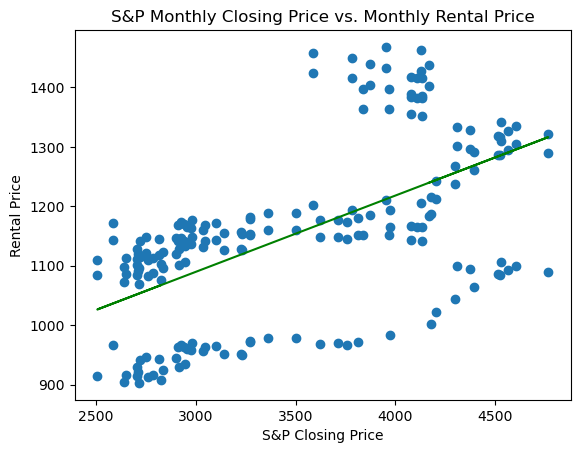

In [25]:
x_values = Rent_SP_Df['Price']
y_values = Rent_SP_Df['median_rent_price']
corr=round(st.pearsonr(Rent_SP_Df['Price'],Rent_SP_Df['median_rent_price'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="red")
plt.xlabel('S&P Closing Price')
plt.ylabel('Rental Price')
plt.title('S&P Monthly Closing Price vs. Monthly Rental Price')
plt.show()

In [26]:
# What is the Pearson R Correlation Value?
r_value = st.pearsonr(Rent_SP_Df['median_rent_price'], Rent_SP_Df['Price'])
print(r_value)

PearsonRResult(statistic=0.5832624463224609, pvalue=6.859972037871958e-19)


## Compare the S&P to Median Housing Data

In [28]:
df = pd.read_csv("newname.csv")
#convert date to date data type
periodbg_unformatted = df['period_begin']
periodend_unformatted = df['period_end']
periodbg_formatted = pd.to_datetime(periodbg_unformatted, format='%m/%d/%Y')
periodend_formatted = pd.to_datetime(periodend_unformatted, format='%m/%d/%Y')
df['period_begin'] = periodbg_formatted
df['period_end'] = periodend_formatted

#df_filtered = df[df['property_type'] == 'Single Family Residential']
df_2018 = df.loc[(df['property_type'] =='Single Family Residential') & (df['period_begin'] >='2018-01-01')]

#sort dates
sorted_df_2018 = df_2018.sort_values(by='period_begin')
sorted_df_2018

,period_begin,period_end,property_type,median_sale_price,median_list_price,homes_sold,new_listings,months_of_supply,price_drops
264,2018-01-01,2018-01-31,Single Family Residential,280000.0,276250.0,519.0,664.0,3.1,0.153080
457,2018-02-01,2018-02-28,Single Family Residential,280000.0,299550.0,531.0,761.0,3.0,0.133292
193,2018-03-01,2018-03-31,Single Family Residential,291000.0,299500.0,759.0,1255.0,2.5,0.165962
284,2018-04-01,2018-04-30,Single Family Residential,297000.0,303250.0,856.0,1285.0,2.4,0.191602
117,2018-05-01,2018-05-31,Single Family Residential,300000.0,297750.0,1129.0,1309.0,2.0,0.244971
...,...,...,...,...,...,...,...,...,...
488,2022-11-01,2022-11-30,Single Family Residential,435000.0,390000.0,576.0,429.0,2.1,0.234702
376,2022-12-01,2022-12-31,Single Family Residential,425000.0,400000.0,567.0,331.0,1.9,0.132776
54,2023-01-01,2023-01-31,Single Family Residential,405000.0,425000.0,385.0,495.0,2.7,0.121622
584,2023-02-01,2023-02-28,Single Family Residential,414513.0,415000.0,441.0,513.0,2.4,0.098659


In [29]:
# Merge Median Home Price Data and S&P Data
Buy_SP_Df = pd.merge(sorted_df_2018, sandp_data_df, left_on='period_begin',right_on='date').reset_index()
Buy_SP_Df.head()

,index,period_begin,period_end,property_type,median_sale_price,median_list_price,homes_sold,new_listings,months_of_supply,price_drops,date,Price,Open,High,Low,Vol.,Change %
0,0,2018-01-01,2018-01-31,Single Family Residential,280000.0,276250.0,519.0,664.0,3.1,0.153080,2018-01-01,2823.81,"2,683.73",2872.87,"2,682.36",NaN,5.62%
1,1,2018-02-01,2018-02-28,Single Family Residential,280000.0,299550.0,531.0,761.0,3.0,0.133292,2018-02-01,2713.83,"2,816.45",2835.96,"2,532.69",NaN,-3.89%
2,2,2018-03-01,2018-03-31,Single Family Residential,291000.0,299500.0,759.0,1255.0,2.5,0.165962,2018-03-01,2640.87,"2,715.22",2801.90,"2,585.89",NaN,-2.69%
3,3,2018-04-01,2018-04-30,Single Family Residential,297000.0,303250.0,856.0,1285.0,2.4,0.191602,2018-04-01,2648.05,"2,633.45",2717.49,"2,553.80",NaN,0.27%
4,4,2018-05-01,2018-05-31,Single Family Residential,300000.0,297750.0,1129.0,1309.0,2.0,0.244971,2018-05-01,2705.27,"2,643.64",2742.24,"2,594.62",NaN,2.16%


##  Is there a correlation between the S&P and Median Sales Price

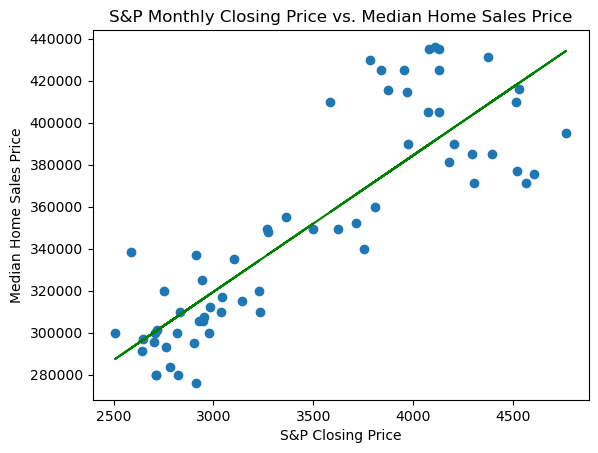

In [34]:
x_values = Buy_SP_Df['Price']
y_values = Buy_SP_Df['median_sale_price']
corr=round(st.pearsonr(Buy_SP_Df['Price'],Buy_SP_Df['median_sale_price'])[0],2)
(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color='green')
plt.annotate(line_eq,(0,50),fontsize=25,color="red")
plt.xlabel('S&P Closing Price')
plt.ylabel('Median Home Sales Price')
plt.title('S&P Monthly Closing Price vs. Median Home Sales Price')
plt.show()

In [35]:
r_value = st.pearsonr(Buy_SP_Df['median_sale_price'], Buy_SP_Df['Price'])
print(r_value)

PearsonRResult(statistic=0.8557042153352565, pvalue=4.1633048641253467e-19)
